# Лабороторная работа №5

## Ласточкин Иван. 11 Вариант

### Цель работы

Изучение принципов построения информационных систем с использованием логических методов классификации.

### Общие сведения

Этот [датасет](https://www.kaggle.com/datasets/mohdnazuan/harumanis-mango-physical-measurement) предназначен для анализа физических параметров манго сорта "Harumanis Mango" (клон номер MA 128). Эти параметры могут включать в себя вес, длину и окружность манго. Важно отметить, что этот датасет был создан, поскольку ранее не было свободно доступных физических данных о манго сорта "Harumanis Mango".

Вот некоторая дополнительная информация о датасете:

- Датасет содержит 105 строк данных, каждая из которых представляет отдельное манго.
- Эти данные были собраны в Fruit Collection Center, FAMA Perlis, Малайзия.
- Похоже, что датасет был создан с целью разработки моделей машинного обучения (Machine Learning) для классификации или оценки манго на основе их физических параметров.
- В датасете также имеется ссылка на научную статью в IEEE Xplore под названием "Grading of Mango Fruit Based on Physical Measurements". Эта статья, возможно, содержит более подробную информацию о целях и методах сбора данных, а также возможные выводы.

Выводы, которые можно сделать при анализе этого датасета, могут включать в себя:

1. Оценка качества манго: Исследователи могут использовать физические параметры манго для разработки моделей оценки и классификации качества плодов. Это может быть полезно для фермеров и продавцов манго.

2. Исследование корреляции: Можно провести анализ корреляции между разными физическими параметрами манго (вес, длина, окружность) и определенными характеристиками или классами качества манго.

3. Машинное обучение: Датасет можно использовать для обучения моделей машинного обучения, таких как классификация или регрессия, для предсказания качества манго на основе их физических параметров.

4. Дополнительные исследования: Датасет может служить основой для дополнительных исследований и анализа, включая создание визуализаций и статистических выводов о манго сорта "Harumanis Mango".

### Ход работы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data_source = "/Users/vane4ka/Downloads/archive/data-2023-01-18.csv"
data = pd.read_csv(data_source, delimiter=',')
data.head(10)

,No,Weight,Length,Circumference,Grade
0,1,486.5,14.0,27.0,A
1,2,388.4,12.0,26.0,A
2,3,493.7,12.0,26.5,A
3,4,342.5,10.0,24.3,A
4,5,401.5,11.0,25.0,A
5,6,342.4,12.5,24.0,A
6,7,338.4,12.5,24.0,A
7,8,387.9,12.4,26.2,A
8,9,451.7,13.4,27.3,A
9,10,349.5,12.0,24.6,A


In [3]:
X = data[['Weight', 'Length', 'Circumference']]
y = data['Grade']

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Подмножества для hold-out
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=12)

# Обучение модели
tree = DecisionTreeClassifier(max_depth=8, 
                              random_state=21, 
                              max_features=2)
tree.fit(X_train, y_train)

# Получение оценки hold-out
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

0.71875


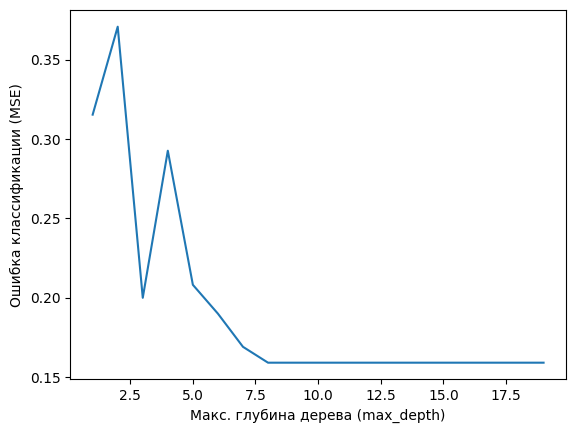

Оптимальные значения max_depth:  [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [5]:
from sklearn.model_selection import cross_val_score

# Значения параметра max_depth
d_list = list(range(1,20))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d, 
                                  random_state=21, 
                                  max_features=2)
    scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
d_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения max_depth: ', all_d_min)

In [6]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)

tree_params = { 'max_depth': range(1,20), 'max_features': range(1,4) }
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(X, y)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)


Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 8, 'max_features': 2}
Лучшие баллы cross validation:  0.840909090909091


In [7]:
from sklearn.tree import export_graphviz
# Генерируем графическое представление дерева
tree.export_graphviz(tree_grid.best_estimator_, 
                     feature_names=X.columns,
                     class_names=y.unique(),
                     out_file='/Users/vane4ka/Downloads/archive/mango.dot',  
                     filled=True, rounded=True);


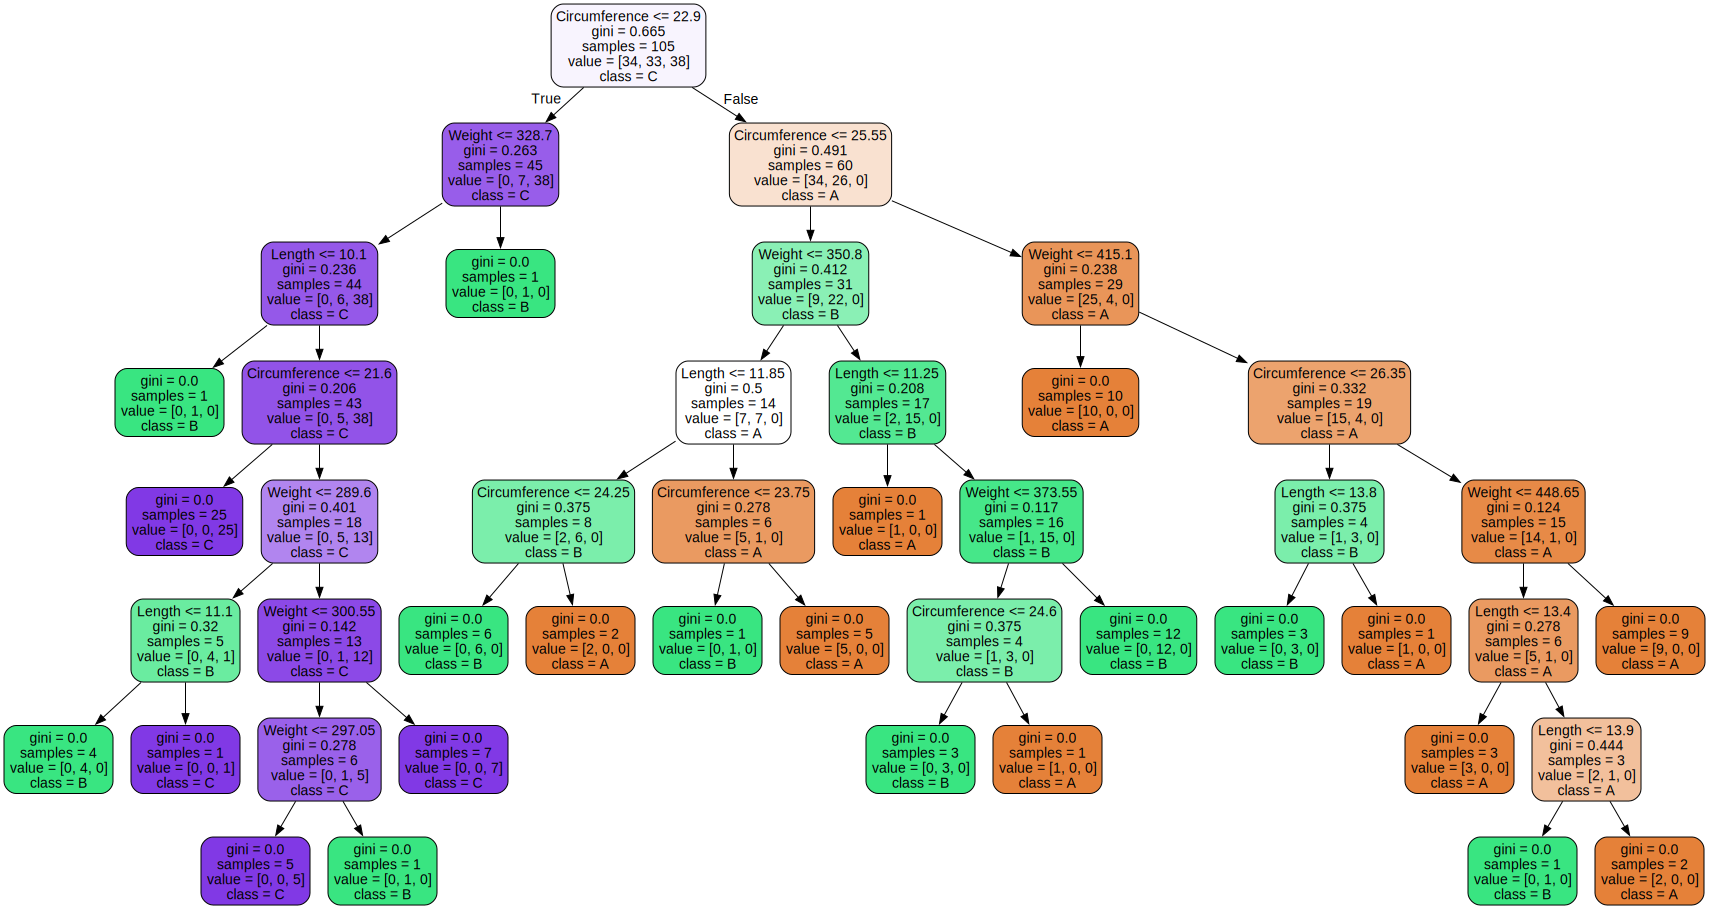

In [8]:
import graphviz

with open('/Users/vane4ka/Downloads/archive/mango.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

/var/folders/gd/q1kn3q7x3tx28rn565y28k080000gn/T/ipykernel_4063/133323690.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
/var/folders/gd/q1kn3q7x3tx28rn565y28k080000gn/T/ipykernel_4063/133323690.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(fmin[j], fmax[j], plot_step))
/var/folders/gd/q1kn3q7x3tx28rn565y28k080000gn/T/ipykernel_4063/133323690.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

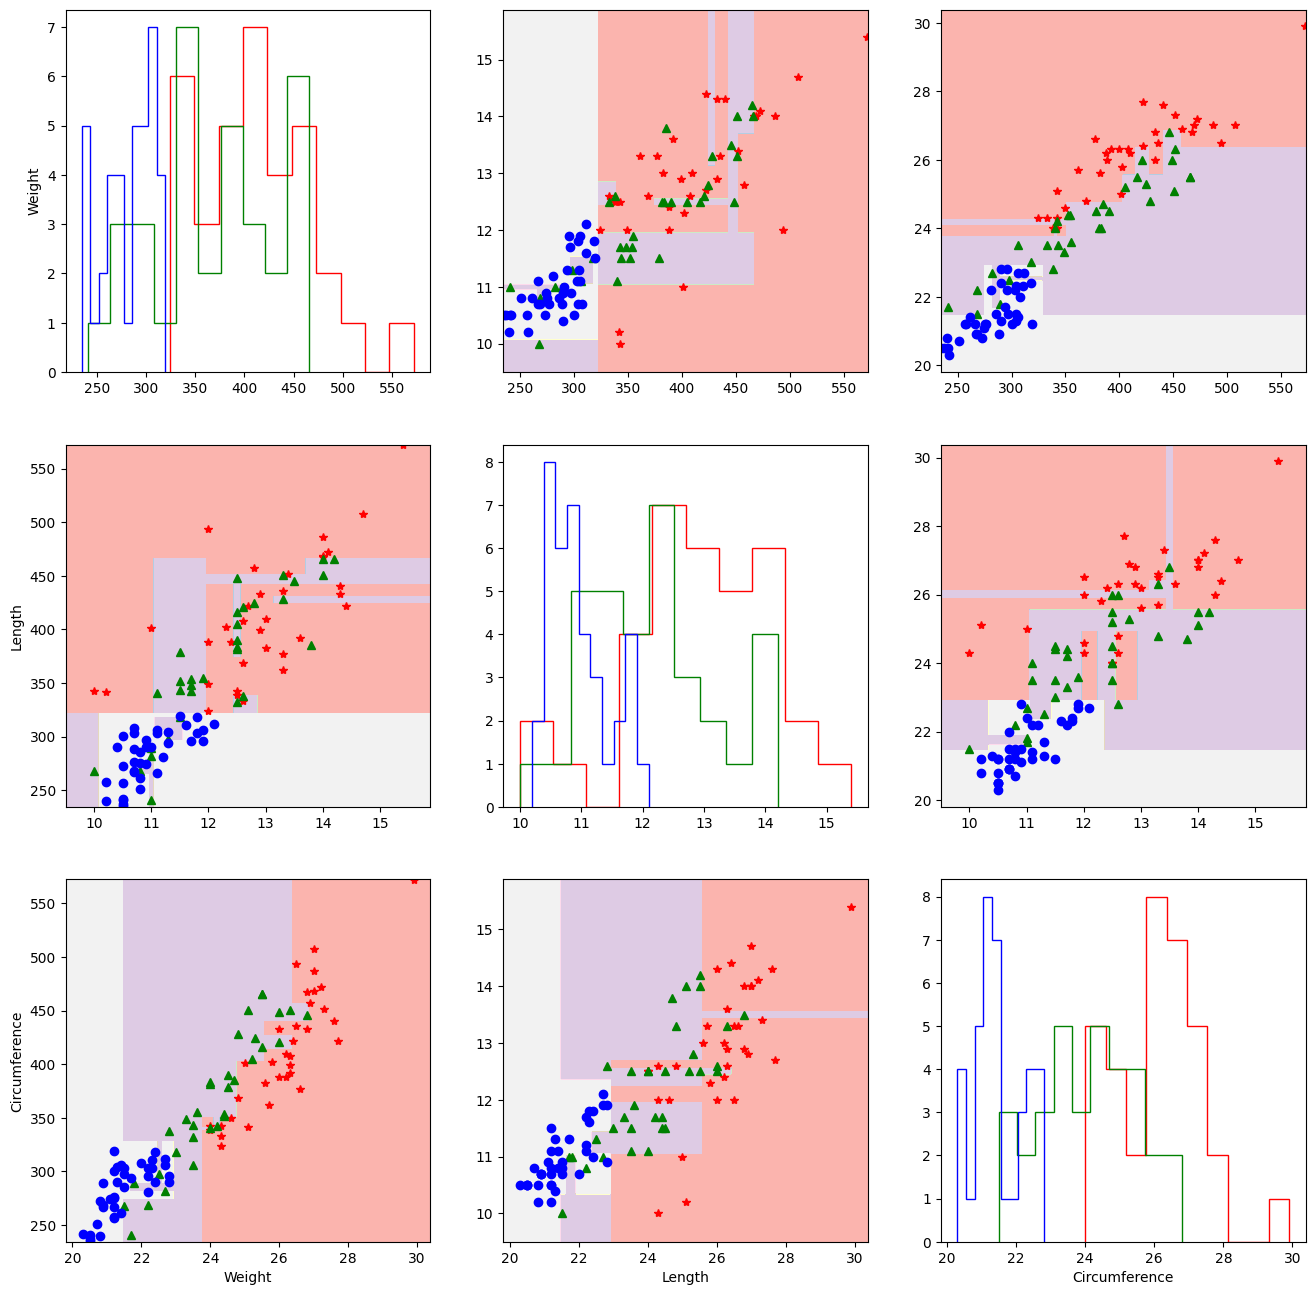

In [13]:
plot_markers = ['r*', 'g^', 'bo']
answers = y.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(3, 3, figsize=(16,16))

fmin = X.min()-0.5
fmax = X.max()+0.5
plot_step = 0.02  

columns_to_compare = ["Weight", "Length", "Circumference"]

# Обходим все subplot
for i in range(0,3):
    for j in range(0,3):

        # Строим решающие границы 
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = DecisionTreeClassifier(max_depth=8, random_state=21, max_features=2)
            model.fit(X.iloc[:, [i,j]].values, y)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0
            p[p==answers[1]] = 1
            p[p==answers[2]] = 2
            xx = xx.astype(np.float32)
            yy = yy.astype(np.float32)
            p = p.astype(np.float32)
            places[i,j].contourf(xx, yy, p, cmap='Pastel1') 
      
        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(y == answers[id_answer])
            if i == j:
                # Сравниваем значения параметра i между классами
                places[i, j].hist(X.loc[idx, columns_to_compare[i]],
                                  color=plot_markers[id_answer][0],
                                  histtype='step', label=f'Class {answers[id_answer]}')
            else:
                # Сравниваем параметры i и j между классами
                places[i, j].plot(X.loc[idx, columns_to_compare[i]], X.loc[idx, columns_to_compare[j]],
                                  plot_markers[id_answer],
                                  label=f'Class {answers[id_answer]}', markersize=6)

        if j == 0:
            places[i, j].set_ylabel(columns_to_compare[i])

        if i == 2:
            places[i, j].set_xlabel(columns_to_compare[j])

In [15]:
# Построим модель для оптимального дерева

dtc = DecisionTreeClassifier(max_depth=8, 
                             random_state=21, 
                             max_features=2)
dtc.fit(X.values, y.values)


# Использование классификатора
# Объявление признаков объекта

Weight = float(input('Введите вес: '))
Length = float(input('Введите длину: '))
Circumference = float(input('Введите округлость: '))
X_new = np.array([[Weight, Length, Circumference]])

# Получение ответа для нового объекта
target = dtc.predict(X_new)[0]


print('\nЭто манго качества: ',target)



Введите вес: 270
Введите длину: 10
Введите округлость: 21

Это манго качества:  B


### Контрольные вопросы

1. **Принцип построения дерева решений:**
   Дерево решений - это метод машинного обучения, который используется для решения задач классификации и регрессии. Принцип построения дерева решений заключается в разбиении данных на более чистые подгруппы путем задания последовательности вопросов и условий. Начиная с корня дерева, на каждом узле делается вопрос о признаке данных, и в зависимости от ответа на этот вопрос, переход осуществляется по одной из ветвей дерева. Процесс повторяется до достижения листового узла, который содержит предсказание.

2. **Статистическое определение информативности:**
   Информативность - это статистическая мера, которая оценивает, насколько информативен конкретный признак или переменная для определения целевой переменной. Чем выше информативность, тем больше влияние признака на предсказание целевой переменной. Обычно информативность измеряется с использованием различных статистических метрик, таких как Information Gain, Gini Impurity, или Chi-squared statistic, в зависимости от типа задачи.

3. **Энтропийное определение информативности:**
   Энтропия - это мера неопределенности или хаоса в системе. В контексте дерева решений, энтропия используется для оценки того, насколько хорошо определен классификационный узел. Начальная энтропия равна 1, если данные равномерно распределены по классам, и 0, если все данные принадлежат к одному классу. Мера Information Gain использует изменение энтропии при разбиении данных для оценки информативности признака.

4. **Многоклассовая информативность:**
   Многоклассовая информативность - это понятие, которое используется в многоклассовой классификации. В задачах многоклассовой классификации существует несколько классов, и информативность позволяет измерить важность признаков для правильной классификации во всех классах. Это может быть особенно полезно при выборе наиболее информативных признаков для построения классификационной модели.

5. **Назначение и алгоритм бинаризации количественных признаков:**
   Бинаризация количественных признаков - это процесс преобразования непрерывных числовых признаков в бинарные (двоичные) признаки, что позволяет использовать их в деревьях решений и других алгоритмах, разработанных для работы с категориальными данными. Например, признак "возраст" можно бинаризовать, создав два бинарных признака "молодой" и "старший". Алгоритм бинаризации включает определение порогового значения, по которому происходит разделение признака на две категории.

6. **Порядок поиска закономерностей в форме конъюнкций:**
   Поиск закономерностей в форме конъюнкций означает поиск правил, которые состоят из нескольких условий, объединенных оператором "и" (конъюнкция). Это используется в деревьях решений и других алгоритмах машинного обучения для определения более сложных закономерностей, которые требуют сочетания нескольких признаков для принятия решения. Например, конъюнкция может выглядеть так: "Если возраст > 30 и доход > 50000, то классифицировать как 'A'". Поиск конъюнктивных закономерностей позволяет моделировать более сложные взаимосвязи между признаками и целевой переменной.